In [1]:
x_data = [1,2,3]
y_data = [1,2,3]

In [2]:
#x와 y의 상관관계를 설명하기 위한 변수 W, b
#uniform distribution 초기화
import tensorflow as tf
import numpy as np

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#자료 입력받을 플레이스 홀더
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

###### 플레이스 홀더에 이름 추가하기 ######
print(X)
print(Y)
#이름 없는 플레이스 홀더
Z = tf.placeholder(tf.float32)
print(Z)

Tensor("X:0", dtype=float32)
Tensor("Y:0", dtype=float32)
Tensor("Placeholder:0", dtype=float32)


In [4]:
### 본격 선형 회귀 ###

# linear 선형 관계
# hypothesis:  W * X + b
h = W * X + b

# loss func. 손실 함수
# 손실값: Y - hypothesis 의 제곱값
# cost = 모든 데이터에 대한 손실값의 평균
cost = tf.reduce_mean(tf.square(h - Y))

#Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)

In [5]:
# 실행

sess= tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    _, cost_val = sess.run([train_op, cost], feed_dict = {X: x_data, Y:y_data})
    print(step, '(cost_val)', cost_val, '    (W)', sess.run(W), '    (b)', sess.run(b))

0 (cost_val) 3.0552623     (W) [0.6485733]     (b) [0.9956611]
1 (cost_val) 0.16807015     (W) [0.5783071]     (b) [0.9370996]
2 (cost_val) 0.12733218     (W) [0.5970473]     (b) [0.91835684]
3 (cost_val) 0.12089259     (W) [0.6057937]     (b) [0.8958665]
4 (cost_val) 0.11514538     (W) [0.61537296]     (b) [0.8743757]
5 (cost_val) 0.10967585     (W) [0.62460786]     (b) [0.85335135]
6 (cost_val) 0.10446615     (W) [0.6336333]     (b) [0.83283794]
7 (cost_val) 0.09950393     (W) [0.6424404]     (b) [0.81281704]
8 (cost_val) 0.09477743     (W) [0.65103585]     (b) [0.7932775]
9 (cost_val) 0.09027544     (W) [0.6594247]     (b) [0.77420765]
10 (cost_val) 0.08598733     (W) [0.66761196]     (b) [0.7555962]
11 (cost_val) 0.08190288     (W) [0.6756024]     (b) [0.7374322]
12 (cost_val) 0.078012384     (W) [0.68340063]     (b) [0.7197048]
13 (cost_val) 0.07430675     (W) [0.6910114]     (b) [0.7024036]
14 (cost_val) 0.07077711     (W) [0.69843936]     (b) [0.6855183]
15 (cost_val) 0.06741515

In [6]:
# test
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())
print("X: 5,    Y:", sess.run(h, feed_dict={X: 5}))
print("X: 2.5,    Y:", sess.run(h, feed_dict={X: 2.5}))


X: 5,    Y: [4.896063]
X: 2.5,    Y: [2.4913564]


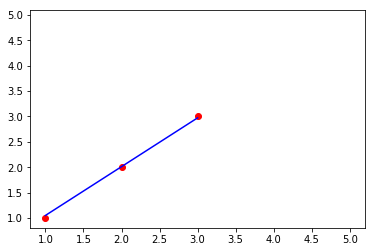

In [7]:
import matplotlib.pyplot as plt

# 주어진 데이터들을 점으로 표시
plt.plot(x_data, y_data, 'ro')
# 예측한 일차함수를 직선으로 표시
plt.plot(x_data, sess.run(W) * x_data + sess.run(b), 'b')
# X=5 일때의 계산 값
plt.plot([5], sess.run(h, feed_dict={X:5}))
plt.show()
sess.close()

0 (cost_val) 19.434471     (W) [1.0803193]     (b) [0.32538003]
1 (cost_val) 0.24051483     (W) [0.8752026]     (b) [0.2281763]
2 (cost_val) 0.010841683     (W) [0.90040964]     (b) [0.23246]
3 (cost_val) 0.007719667     (W) [0.9003767]     (b) [0.22580417]
4 (cost_val) 0.007321852     (W) [0.90303683]     (b) [0.22049268]
5 (cost_val) 0.0069736806     (W) [0.90533876]     (b) [0.21517941]
6 (cost_val) 0.006642416     (W) [0.90761745]     (b) [0.21000803]
7 (cost_val) 0.0063268933     (W) [0.90983796]     (b) [0.20495945]
8 (cost_val) 0.006026361     (W) [0.9120054]     (b) [0.20003238]
9 (cost_val) 0.0057401024     (W) [0.91412073]     (b) [0.19522373]
X: 5,    Y: [4.7658277]
X: 2.5,    Y: [2.4805257]


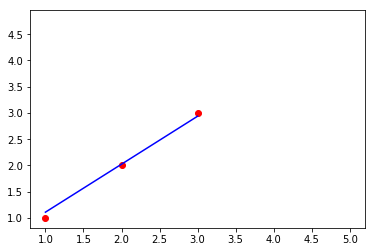

In [8]:
# 파이썬의 with 이용: 세션 블록을 만들고 자동으로 세션 종료.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10):
        _, cost_val = sess.run([train_op, cost], feed_dict = {X: x_data, Y:y_data})
        print(step, '(cost_val)', cost_val, '    (W)', sess.run(W), '    (b)', sess.run(b))

    #test
    print("X: 5,    Y:", sess.run(h, feed_dict={X: 5}))
    print("X: 2.5,    Y:", sess.run(h, feed_dict={X: 2.5}))
    
    # 주어진 데이터들을 점으로 표시
    plt.plot(x_data, y_data, 'ro')
    # 예측한 일차함수를 직선으로 표시
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b), 'b')
    # X=5 일때의 계산 값
    plt.plot([5], sess.run(h, feed_dict={X:5}))
    plt.show()
